In [73]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

#This can prevent multi-threading conflicts, reduce CPU load, or help in debugging.
#Some libraries or operations (e.g., NumPy operations or machine learning libraries) use OpenMP to parallelize tasks across multiple threads by default. This can sometimes lead to issues, such as excessive CPU usage

In [74]:
import pandas as pd

In [75]:
import matplotlib.pyplot as plt

In [76]:
import seaborn as sns

In [77]:
from sklearn.cluster import KMeans

In [78]:
df=pd.read_csv("Mall_Customers.csv")

In [79]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [80]:
### Check Null Values

In [81]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [82]:
### Observation: There is no missing values.

In [83]:
### Visual and Statistical Understanding of data

In [84]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

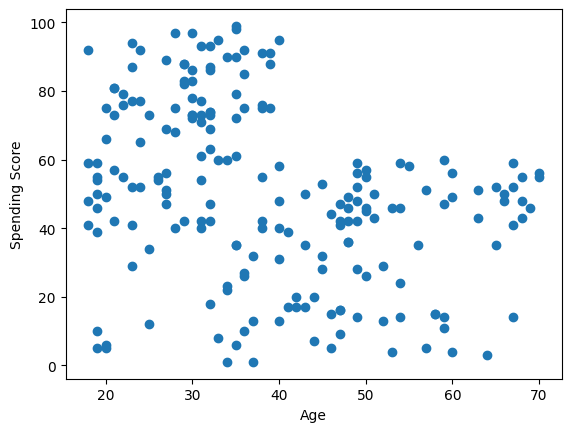

In [85]:
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

In [86]:
### Observation: It seems to purpose two types of Customer

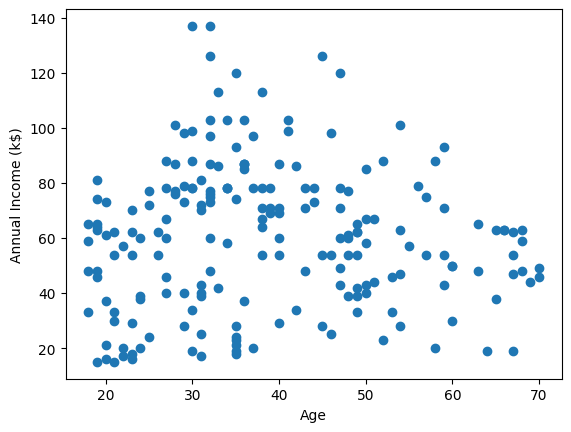

In [87]:
plt.scatter(df["Age"],df["Annual Income (k$)"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)") 
plt.show()

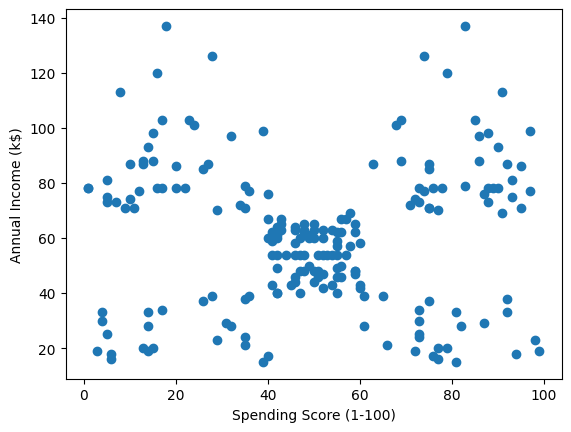

In [88]:
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)") 
plt.show()

In [89]:
### Observation: No Group

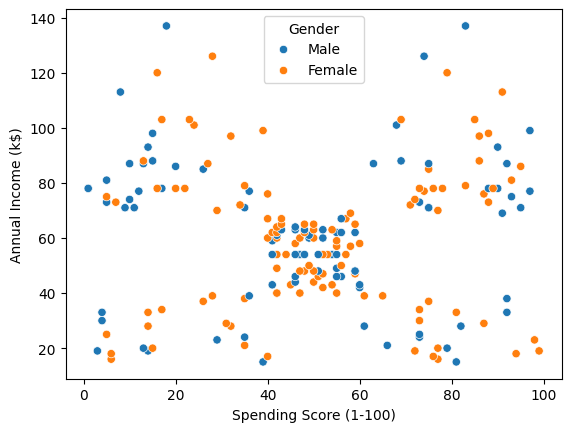

In [90]:
sns.scatterplot(x=df["Spending Score (1-100)"], y=df["Annual Income (k$)"], hue=df['Gender'])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

In [91]:
### It seems to purpose five Groups

In [92]:
relevant_cols = ["Age", "Annual Income (k$)", 
                 "Spending Score (1-100)"]

customer_df = df[relevant_cols]

In [93]:
customer_df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()

In [96]:
scaler.fit(customer_df)

StandardScaler()

In [97]:
scaled_data = scaler.transform(customer_df)

In [98]:
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [99]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

#measure of how tightly grouped the data points are within their clusters using elbow method. The inertia decreases as the number of clusters increases, but at some point, adding more clusters gives diminishing returns

In [100]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

In [101]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

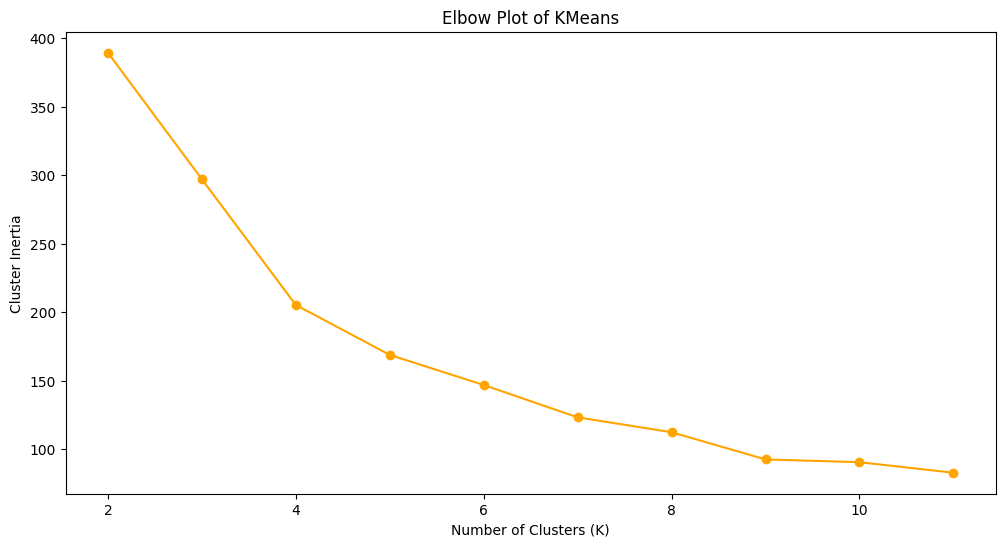

In [102]:
generate_elbow_plot(clusters_centers, k_values)

In [103]:
kmeans_model = KMeans(n_clusters = 5)

In [104]:
kmeans_model.fit(scaled_data)

KMeans(n_clusters=5)

In [105]:
### We can access the cluster to which each data point belongs by using the .labels_ attribute.

In [106]:
df["clusters"] = kmeans_model.labels_

In [107]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,4


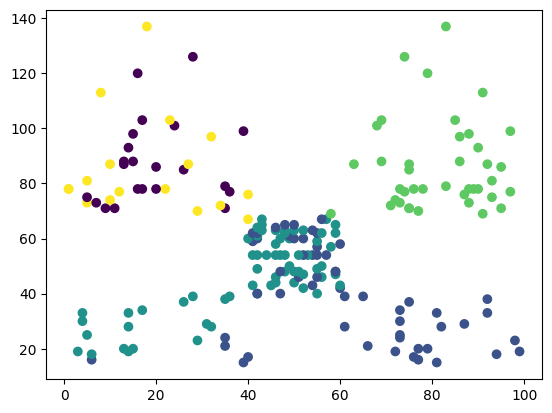

In [108]:
plt.scatter(df["Spending Score (1-100)"], 
            df["Annual Income (k$)"], 
            c = df["clusters"]
            )